## `Step-0`: Basic data loading and processing

In [2]:
# ====== Import Required Libraries ====== 
import pandas as pd
import numpy as np

# ====== Load Ground_Truth Dataset ======

data = pd.read_csv(filepath_or_buffer="E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\Ground_Truth.csv")
print(data.shape)
data.head(10)

(111010, 6)


,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP
1,00000248_006.png,Atelectasis|Infiltration,248,87,M,AP
2,00000248_007.png,Atelectasis|Infiltration,248,87,M,AP
3,00000248_008.png,Atelectasis,248,87,M,AP
4,00000248_009.png,Atelectasis,248,87,M,AP
5,00000248_010.png,Atelectasis,248,87,M,AP
6,00000248_011.png,No Finding,248,87,M,AP
7,00000248_012.png,No Finding,248,87,M,PA
8,00000248_013.png,Mass,248,87,M,AP
9,00000248_014.png,Effusion|Pleural_Thickening,248,87,M,AP


In [3]:
cols = {
    'Image Index': 'image_index',
    'Finding Labels': 'finding_labels',
    'Patient ID': 'patient_id',
    'Patient Age': 'patient_age',
    'Patient Gender': 'patient_gender',
    'View Position': 'view_position'
}

data.rename(columns=cols, inplace=True)
data.head()

,image_index,finding_labels,patient_id,patient_age,patient_gender,view_position
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP
1,00000248_006.png,Atelectasis|Infiltration,248,87,M,AP
2,00000248_007.png,Atelectasis|Infiltration,248,87,M,AP
3,00000248_008.png,Atelectasis,248,87,M,AP
4,00000248_009.png,Atelectasis,248,87,M,AP


In [4]:
# ====== Import Image Processing Libraries ======

import pathlib
import PIL.Image as Image

 # ====== Load Image Dataset ======

image_dir = pathlib.Path("E:/AIML-Projects/Chest-X-ray-Disease-Classification/Chest_XRay_Dataset/xray_images/")
image_paths = list(image_dir.glob('*.png'))
image_count = len(image_paths)
print(f"Total number of images: {image_count}")

Total number of images: 3710


In [5]:
# ====== Concatenate Image Paths with Ground_Truth DataFrame ======

data['image_path'] = data['image_index'].apply(lambda x: image_dir/x)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111010 entries, 0 to 111009
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   image_index     111010 non-null  object
 1   finding_labels  111010 non-null  object
 2   patient_id      111010 non-null  int64 
 3   patient_age     111010 non-null  int64 
 4   patient_gender  111010 non-null  object
 5   view_position   111010 non-null  object
 6   image_path      111010 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.9+ MB


In [7]:
pd.set_option('display.max_columns', None)      # show all columns
pd.set_option('display.max_colwidth', None)     # show full column contents (no truncation)

data[data.index % 2 == 0].shape

(55505, 7)

In [8]:
data.head(10)

,image_index,finding_labels,patient_id,patient_age,patient_gender,view_position,image_path
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP,E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\xray_images\00000248_005.png
1,00000248_006.png,Atelectasis|Infiltration,248,87,M,AP,E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\xray_images\00000248_006.png
2,00000248_007.png,Atelectasis|Infiltration,248,87,M,AP,E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\xray_images\00000248_007.png
3,00000248_008.png,Atelectasis,248,87,M,AP,E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\xray_images\00000248_008.png
4,00000248_009.png,Atelectasis,248,87,M,AP,E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\xray_images\00000248_009.png
5,00000248_010.png,Atelectasis,248,87,M,AP,E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\xray_images\00000248_010.png
6,00000248_011.png,No Finding,248,87,M,AP,E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\xray_images\00000248_011.png
7,00000248_012.png,No Finding,248,87,M,PA,E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\xray_images\00000248_012.png
8,00000248_013.png,Mass,248,87,M,AP,E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\xray_images\00000248_013.png
9,00000248_014.png,Effusion|Pleural_Thickening,248,87,M,AP,E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\xray_images\00000248_014.png


- The image_index and image_path are in the same order, so we can now perform data augmentation.

In [9]:
df = data[data["image_path"].apply(lambda x: x.exists())].reset_index(drop=True)
df.shape

(3681, 7)

### Note:


- Among all `Ground_Truth` the datasets, only the `3681` one has a valid image.

In [10]:
print((df['finding_labels'] == 'No Finding').sum())

df.head()

2133


,image_index,finding_labels,patient_id,patient_age,patient_gender,view_position,image_path
0,00000250_006.png,No Finding,250,49,M,AP,E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\xray_images\00000250_006.png
1,00000250_007.png,Infiltration,250,49,M,AP,E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\xray_images\00000250_007.png
2,00000250_008.png,Effusion,250,49,M,AP,E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\xray_images\00000250_008.png
3,00000250_009.png,No Finding,250,49,M,AP,E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\xray_images\00000250_009.png
4,00000250_010.png,Consolidation|Effusion,250,49,M,PA,E:\AIML-Projects\Chest-X-ray-Disease-Classification\Chest_XRay_Dataset\xray_images\00000250_010.png


### Preprocessing for ` Multi Label` problem

- Use the sklearn's MultiLabelBinarizer prepreprocessing model

In [11]:
df["finding_labels"] = df["finding_labels"].apply(
    lambda labels: "Healthy" if labels == 'No Finding' else labels
)

In [12]:
print(df.shape)
df['finding_labels'].value_counts()

(3681, 7)


finding_labels
Healthy                            2133
Infiltration                        317
Atelectasis                         138
Effusion                             82
Nodule                               82
                                   ... 
Atelectasis|Infiltration|Nodule       1
Cardiomegaly|Hernia                   1
Nodule|Pneumothorax                   1
Cardiomegaly|Effusion|Hernia          1
Fibrosis|Infiltration|Nodule          1
Name: count, Length: 170, dtype: int64

## `Step 1`: Data Preprocessing (OpenCV)

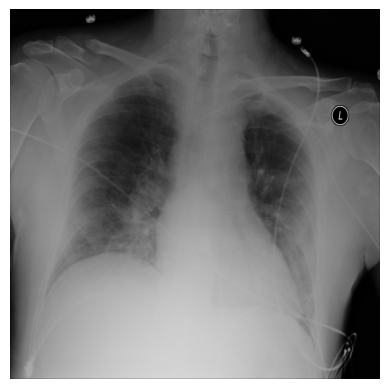

In [13]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt


img = cv2.imread(str(df['image_path'][0]), cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()


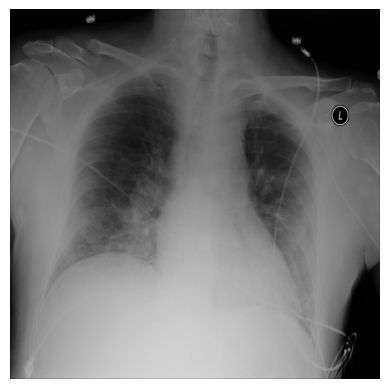

In [14]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(str(df['image_path'][0]))

# Convert BGR → RGB (since OpenCV loads in BGR format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")  # hide axes
plt.show()

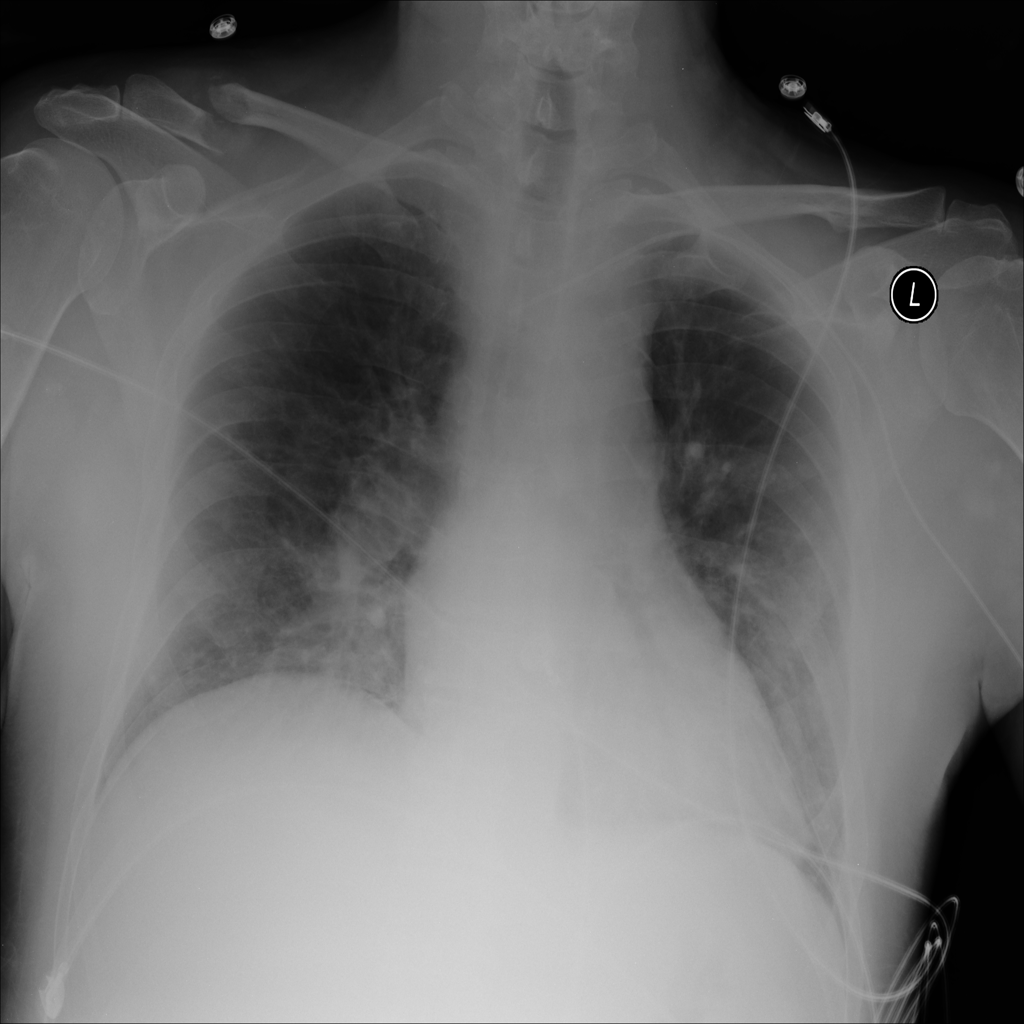

In [15]:
# Before resizing

Image.open(df['image_path'][0])

### Resize all images to 224x224 pixels.

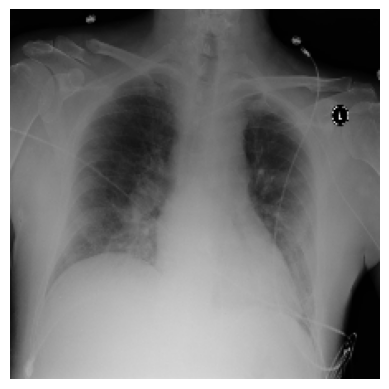

In [16]:
# After resizing
img_resized = cv2.resize(img_rgb, (224, 224))
plt.imshow(img_resized)
plt.axis("off")
plt.show()

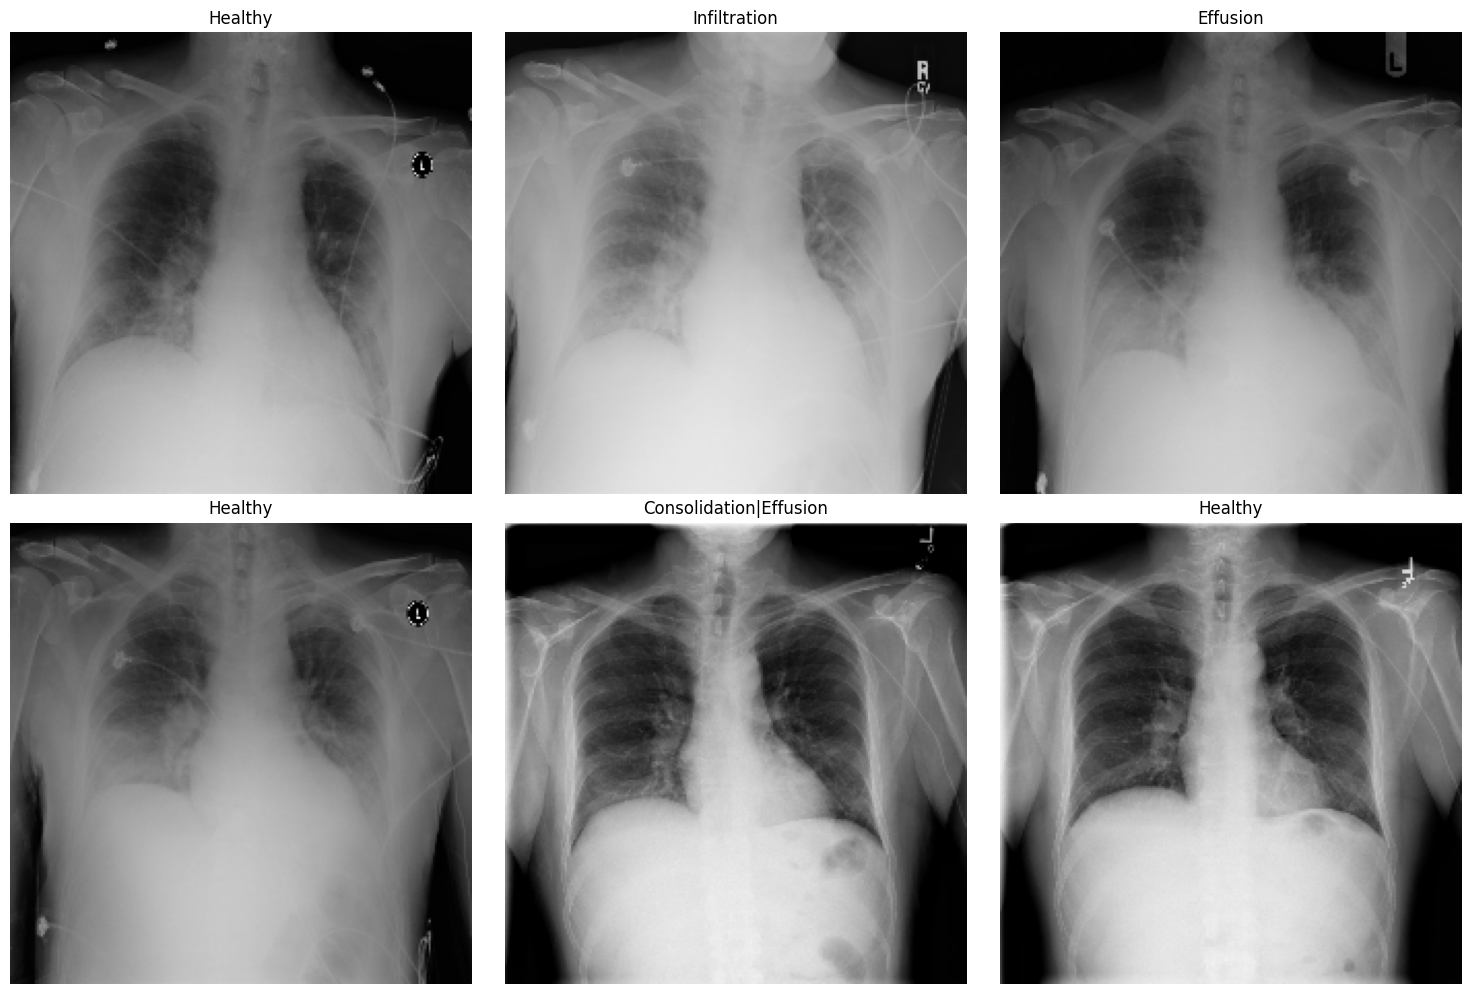

In [17]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # <-- fig first, axs second

axs = axs.ravel()  # flatten 2x3 grid into 1D array of 6 axes

for i, x in enumerate(df['image_path'][0:6]):
    img = cv2.imread(str(x))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))

    axs[i].imshow(img_resized)
    axs[i].set_title(df['finding_labels'][i])
    axs[i].axis("off")

plt.tight_layout()
plt.show()

#### The above images are the after resized images (224, 224)

In [18]:
# ====== extract the x values ======

x = []

for path in df['image_path']:
    img = cv2.imread(str(path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))
    x.append(img_resized)

In [19]:
# ====== MultiLabelBinarizer to handle multi label problem======
from sklearn.preprocessing import MultiLabelBinarizer

# Split labels by "|" → list of labels
df["finding_labels"] = df["finding_labels"].apply(lambda x: x.split("|"))

# Fit binarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df["finding_labels"])

print("Classes:", mlb.classes_)

np.save(r'E:\AIML-Projects\Chest-X-ray-Disease-Classification\Preprocessed_Data\classes.npy', np.array(mlb.classes_))

Classes: ['Atelectasis' 'Cardiomegaly' 'Consolidation' 'Edema' 'Effusion'
 'Emphysema' 'Fibrosis' 'Healthy' 'Hernia' 'Infiltration' 'Mass' 'Nodule'
 'Pleural_Thickening' 'Pneumonia' 'Pneumothorax']


In [20]:
# Save the MultiLabelBinarizer for future use
import joblib
joblib.dump(mlb, r'E:\AIML-Projects\Chest-X-ray-Disease-Classification\models\multilabel_binarizer.pkl')
print("💾 MultiLabelBinarizer saved as 'multilabel_binarizer.pkl'")

💾 MultiLabelBinarizer saved as 'multilabel_binarizer.pkl'


In [21]:
# ====== print x and y ======

print(x[:2])
print('======================================================================================================')
print(y[:2])

[array([[[ 3,  3,  3],
        [ 3,  3,  3],
        [ 2,  2,  2],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 2,  2,  2],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[ 3,  3,  3],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       ...,

       [[55, 55, 55],
        [73, 73, 73],
        [84, 84, 84],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[59, 59, 59],
        [76, 76, 76],
        [86, 86, 86],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[62, 62, 62],
        [81, 81, 81],
        [86, 86, 86],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]]], dtype=uint8), array([[[ 13,  13,  13],
        [ 13,  13,  13],
        [ 12,  12,  12],
        ...,
  

In [22]:
# ======= Split the dataset into training, testing and validation sets ======
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Testing set: {len(X_test)} samples")

Training set: 2208 samples
Validation set: 736 samples
Testing set: 737 samples


In [23]:
# ====== Save Preprocessed Data ======
import numpy as np
np.save(r'E:\AIML-Projects\Chest-X-ray-Disease-Classification\Preprocessed_Data\X_train.npy', np.array(X_train))
np.save(r'E:\AIML-Projects\Chest-X-ray-Disease-Classification\Preprocessed_Data\X_val.npy', np.array(X_val))
np.save(r'E:\AIML-Projects\Chest-X-ray-Disease-Classification\Preprocessed_Data\X_test.npy', np.array(X_test))
np.save(r'E:\AIML-Projects\Chest-X-ray-Disease-Classification\Preprocessed_Data\y_train.npy', np.array(y_train))
np.save(r'E:\AIML-Projects\Chest-X-ray-Disease-Classification\Preprocessed_Data\y_val.npy', np.array(y_val))
np.save(r'E:\AIML-Projects\Chest-X-ray-Disease-Classification\Preprocessed_Data\y_test.npy', np.array(y_test))